# Part 1 - Data Acquisition / Pre-processing

In [1]:
#Before starting, please install this pacakge for keras
#Only for Google Colab
#!pip install keras 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("C:\\Users\\Nael\\studentmental1.csv")
dataset.head(5)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Anxiety?,Do you have Panic attack?,Do you have Depression?
0,8/7/2020 12:04,Male,21.0,Islamic education,year 2,0 - 1.99,No,Yes,No,No
1,8/7/2020 12:05,Male,21.0,BIT,Year 1,3.50 - 4.00,No,Yes,Yes,Yes
2,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No
3,8/7/2020 12:31,Male,19.0,Engineering,Year 2,0 - 1.99,No,No,Yes,No
4,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,No,Yes,Yes


**Basic understandings of dataset**

In [3]:
# Viewing the Dataset Size for Total Rows and Columns
print("Size of the dataset:")
print(dataset.shape)

Size of the dataset:
(81, 10)


General Information about dataset

In [4]:
# General Information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   81 non-null     object 
 1   Choose your gender          81 non-null     object 
 2   Age                         77 non-null     float64
 3   What is your course?        81 non-null     object 
 4   Your current year of Study  81 non-null     object 
 5   What is your CGPA?          81 non-null     object 
 6   Marital status              81 non-null     object 
 7   Do you have Anxiety?        81 non-null     object 
 8   Do you have Panic attack?   81 non-null     object 
 9   Do you have Depression?     81 non-null     object 
dtypes: float64(1), object(9)
memory usage: 6.5+ KB


Columns are renamed and the "Date_Time" column is dropped as it will not be necessary in the future

In [5]:
# Renaming every column to be easier to work with
dataset.columns =['Date_Time','Gender','Age','Course','Year','CGPA','Marital_status','Anxiety','Panic_attack','Depression']
dataset = dataset.drop("Date_Time",axis='columns') #Dropped column as it is not necessary for future uses
dataset.head(5)

,Gender,Age,Course,Year,CGPA,Marital_status,Anxiety,Panic_attack,Depression
0,Male,21.0,Islamic education,year 2,0 - 1.99,No,Yes,No,No
1,Male,21.0,BIT,Year 1,3.50 - 4.00,No,Yes,Yes,Yes
2,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No
3,Male,19.0,Engineering,Year 2,0 - 1.99,No,No,Yes,No
4,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,No,Yes,Yes


Check the datatype for each column in the dataset

In [6]:
# Checking datatype of each column
dataset.dtypes

Gender             object
Age               float64
Course             object
Year               object
CGPA               object
Marital_status     object
Anxiety            object
Panic_attack       object
Depression         object
dtype: object

**Dealing with missing values**

In [7]:
# Checks for total missing values in each column
dataset.isnull().sum()

Gender            0
Age               4
Course            0
Year              0
CGPA              0
Marital_status    0
Anxiety           0
Panic_attack      0
Depression        0
dtype: int64

Identify the mean value for age column and round it up to be used for replacing missing values in the 'Age' Column

In [8]:
# Identify mean value in "age" column
dataset['Age'].describe()

count    77.000000
mean     20.623377
std       2.471091
min      18.000000
25%      18.000000
50%      19.000000
75%      23.000000
max      24.000000
Name: Age, dtype: float64

In [9]:
# Round up mean value to be used for replacing missing values
dataset.Age.fillna(21, inplace=True)
dataset.isnull().sum()

Gender            0
Age               0
Course            0
Year              0
CGPA              0
Marital_status    0
Anxiety           0
Panic_attack      0
Depression        0
dtype: int64

**Standardizing Course Names**

In [10]:
# Identifying all the unique values in the column "Course"
all_course = dataset['Course'].unique().tolist()
print('No. of courses: ', len(all_course))
print(all_course)

No. of courses:  42
['Islamic education', 'BIT', 'Mathemathics', 'Engineering', 'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs', 'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science', 'KOE', 'Banking Studies', 'Business Administration', 'KIRKHS', 'Usuluddin ', 'TAASL', 'Laws', 'ALA', 'Biomedical science', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ', 'Biotechnology', 'Communication ', 'Diploma Nursing', 'Pendidikan Islam ', 'Radiography', 'Fiqh fatwa ', 'DIPLOMA TESL', 'Koe', 'Fiqh', 'Nursing ', 'Pendidikan Islam']


In [11]:
# Standardizing values by replacing certain unique values.
dataset['Course'].replace({'BIT':'IT','Pendidikan islam':'Pendidikan Islam', 'Pendidikan Islam ':'Pendidikan Islam',
                           'KENMS':'ENM','KOE':'Koe','Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'BENL':'Benl',
                           'Diploma Nursing': 'Nursing','Nursing ': 'Nursing','Fiqh fatwa':'Fiqh'}, inplace = True)

# Confirming values have been replaced
all_course = dataset['Course'].unique().tolist()
print('No. of courses: ', len(all_course))
print(all_course)

No. of courses:  33
['Islamic education', 'IT', 'Mathemathics', 'Engineering', 'Pendidikan Islam', 'BCS', 'Human Resources', 'Irkhs', 'Psychology', 'ENM', 'Accounting ', 'Marine science', 'Koe', 'Banking Studies', 'Business Administration', 'Usuluddin ', 'TAASL', 'Laws', 'ALA', 'Biomedical science', 'Benl', 'CTS', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ', 'Biotechnology', 'Communication ', 'Nursing', 'Radiography', 'Fiqh fatwa ', 'DIPLOMA TESL', 'Fiqh']


In [12]:
dataset.head(5)

,Gender,Age,Course,Year,CGPA,Marital_status,Anxiety,Panic_attack,Depression
0,Male,21.0,Islamic education,year 2,0 - 1.99,No,Yes,No,No
1,Male,21.0,IT,Year 1,3.50 - 4.00,No,Yes,Yes,Yes
2,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No
3,Male,19.0,Engineering,Year 2,0 - 1.99,No,No,Yes,No
4,Female,23.0,Pendidikan Islam,year 2,3.50 - 4.00,Yes,No,Yes,Yes


**Formatting Year Column**

In [13]:
# Identify all unique values in the column "Year"
print("Before Formatting: ", dataset['Year'].unique().tolist())

# Only extract the integer value from the year
def clearText(year):
    year = year[-1]
    return int(year)
dataset['Year'] = dataset['Year'].apply(clearText)

# Check changes for unique values in column "Year"
print("After Formatting", dataset['Year'].unique().tolist())

Before Formatting:  ['year 2', 'Year 1', 'year 4', 'Year 2', 'year 1', 'Year 3', 'year 3']
After Formatting [2, 1, 4, 3]


**Transform Categorical Variables into Numerical Values**

In [14]:
dataset.head(5)

,Gender,Age,Course,Year,CGPA,Marital_status,Anxiety,Panic_attack,Depression
0,Male,21.0,Islamic education,2,0 - 1.99,No,Yes,No,No
1,Male,21.0,IT,1,3.50 - 4.00,No,Yes,Yes,Yes
2,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No
3,Male,19.0,Engineering,2,0 - 1.99,No,No,Yes,No
4,Female,23.0,Pendidikan Islam,2,3.50 - 4.00,Yes,No,Yes,Yes


In [15]:
# Maps "Yes" "No" values to 0 or 1 respectively
dataset['Marital_status'] = dataset['Marital_status'].map({'Yes': 1, 'No': 0})
dataset['Anxiety'] = dataset['Anxiety'].map({'Yes': 1, 'No': 0})
dataset['Panic_attack'] = dataset['Panic_attack'].map({'Yes': 1, 'No': 0})
dataset['Depression'] = dataset['Depression'].map({'Yes': 1, 'No': 0})

dataset.head(5)

,Gender,Age,Course,Year,CGPA,Marital_status,Anxiety,Panic_attack,Depression
0,Male,21.0,Islamic education,2,0 - 1.99,0,1,0,0
1,Male,21.0,IT,1,3.50 - 4.00,0,1,1,1
2,Male,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0
3,Male,19.0,Engineering,2,0 - 1.99,0,0,1,0
4,Female,23.0,Pendidikan Islam,2,3.50 - 4.00,1,0,1,1


In [16]:
#Since Gender and Course are in categorical values, label encoding is applied to change it to numerical values
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Course']
dataset[cols] = dataset[cols].apply(LabelEncoder().fit_transform)
dataset.head()

,Gender,Age,Course,Year,CGPA,Marital_status,Anxiety,Panic_attack,Depression
0,1,21.0,19,2,0 - 1.99,0,1,0,0
1,1,21.0,17,1,3.50 - 4.00,0,1,1,1
2,1,23.0,26,4,3.00 - 3.49,0,0,0,0
3,1,19.0,12,2,0 - 1.99,0,0,1,0
4,0,23.0,28,2,3.50 - 4.00,1,0,1,1


**CGPA Whitespace removal**

In [17]:
# Identify Unique Values of "CGPA" column
print("Before Formatting: ", dataset['CGPA'].unique().tolist())
def whitespace_removal(value):
    value = value.strip() #strip() is used to remove any space at beginning/end of string
    return value
dataset['CGPA'] = dataset['CGPA'].apply(whitespace_removal)

# Check that all whitespaces have been removed
print("After Formatting: ", dataset['CGPA'].unique().tolist())

Before Formatting:  ['0 - 1.99', '3.50 - 4.00 ', '3.00 - 3.49', '2.50 - 2.99', '3.50 - 4.00', '2.00 - 2.49']
After Formatting:  ['0 - 1.99', '3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49']


**Assigning Midpoint value for column "CGPA"**

In [18]:
#Finding midpoint of CGPA
def midpoint(value):
    if value == '0 - 1.99':
        value =  "{:.2f}".format((0.00 + 1.99)/2)

    elif value == '2.00 - 2.49':
        value =  "{:.2f}".format((2.00 + 2.49)/2)

    elif value == '2.50 - 2.99':
        value =  "{:.2f}".format((2.50 + 2.99)/2)

    elif value == '3.00 - 3.49':
        value =  "{:.2f}".format((3.00 + 3.49)/2)

    else:
        value = "{:.2f}".format((3.50 + 4.00) / 2)

    return float(value)

# Assign Midpoint value to "CGPA" column
dataset['CGPA'] = dataset['CGPA'].apply(midpoint)
dataset.head()

,Gender,Age,Course,Year,CGPA,Marital_status,Anxiety,Panic_attack,Depression
0,1,21.0,19,2,0.99,0,1,0,0
1,1,21.0,17,1,3.75,0,1,1,1
2,1,23.0,26,4,3.25,0,0,0,0
3,1,19.0,12,2,0.99,0,0,1,0
4,0,23.0,28,2,3.75,1,0,1,1


# -- End of Data Processing --

# Part 2 - EDA

In [19]:
# Ensuring that datatypes of all column are properly formatted
dataset.dtypes

Gender              int32
Age               float64
Course              int32
Year                int64
CGPA              float64
Marital_status      int64
Anxiety             int64
Panic_attack        int64
Depression          int64
dtype: object

In [20]:
# Ensuring that there are no more columns with missing data
dataset.isnull().sum()

Gender            0
Age               0
Course            0
Year              0
CGPA              0
Marital_status    0
Anxiety           0
Panic_attack      0
Depression        0
dtype: int64

In [21]:
# Describe every column including those with non-numerical values as a summary
dataset.describe(include="all")

,Gender,Age,Course,Year,CGPA,Marital_status,Anxiety,Panic_attack,Depression
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,0.283951,20.641975,13.604938,2.049383,2.797160,0.160494,0.296296,0.308642,0.271605
std,0.453723,2.409920,8.715904,0.986170,1.080085,0.369350,0.459468,0.464811,0.447559
min,0.000000,18.000000,0.000000,1.000000,0.990000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,5.000000,1.000000,2.250000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,20.000000,12.000000,2.000000,3.250000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,23.000000,20.000000,3.000000,3.750000,0.000000,1.000000,1.000000,1.000000
max,1.000000,24.000000,32.000000,4.000000,3.750000,1.000000,1.000000,1.000000,1.000000


In [22]:
# Print all unqiue values from each column
for i in dataset.columns:
    print("Unique Values in: ", i)
    print(dataset[i].unique())
    print()

Unique Values in:  Gender
[1 0]

Unique Values in:  Age
[21. 23. 19. 18. 20. 24. 22.]

Unique Values in:  Course
[19 17 26 12 28  2 15 18 29 11  1 25 20  3  7 32 31 22  0  5  4  8 23 24
 21 16  6  9 27 30 14 10 13]

Unique Values in:  Year
[2 1 4 3]

Unique Values in:  CGPA
[0.99 3.75 3.25 2.75 2.25]

Unique Values in:  Marital_status
[0 1]

Unique Values in:  Anxiety
[1 0]

Unique Values in:  Panic_attack
[0 1]

Unique Values in:  Depression
[0 1]



In [23]:
# Print total count for all unique values in every column
for i in dataset.columns:
    if i != "Gender" and i != "Course":
        print("Total Count in: ", i)
        print(dataset[i].value_counts())
        print()

Total Count in:  Age
18.0    22
24.0    18
19.0    17
23.0    10
21.0     7
20.0     5
22.0     2
Name: Age, dtype: int64

Total Count in:  Year
1    30
2    24
3    20
4     7
Name: Year, dtype: int64

Total Count in:  CGPA
3.75    31
0.99    18
3.25    18
2.25     9
2.75     5
Name: CGPA, dtype: int64

Total Count in:  Marital_status
0    68
1    13
Name: Marital_status, dtype: int64

Total Count in:  Anxiety
0    57
1    24
Name: Anxiety, dtype: int64

Total Count in:  Panic_attack
0    56
1    25
Name: Panic_attack, dtype: int64

Total Count in:  Depression
0    59
1    22
Name: Depression, dtype: int64



**Visualization**

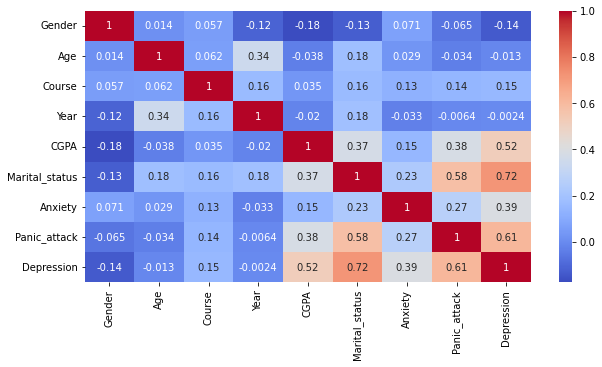

In [24]:
# Heatmap for correlation between columns of data
plt.figure(figsize = (10,5))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.show()

<AxesSubplot:>

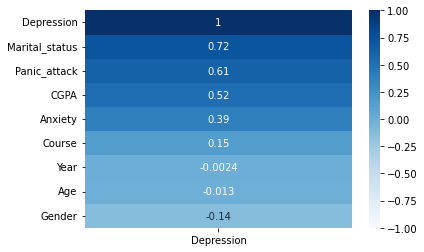

In [25]:
# Heatmap in Descending order between "Depression" column and others
dfcorr = dataset.corr()
sns.heatmap(dfcorr[['Depression']].sort_values(by=['Depression'], ascending=False), vmin=-1, cmap='Blues', annot = True, yticklabels=True)

Based on below graph, Conclusion = Students with higher grades are more likely to be diagnosed with Depression

<AxesSubplot:xlabel='CGPA', ylabel='Depression'>

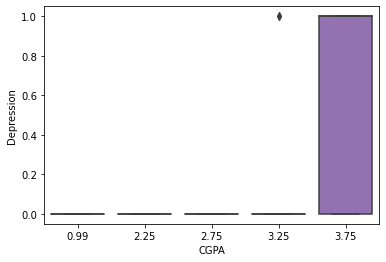

In [26]:
# Boxplot with the X axis being CGPA data points, and Y axis indicating whether there is Depression or not
sns.boxplot(x = "CGPA", y = "Depression", data = dataset)

<AxesSubplot:xlabel='Depression', ylabel='Age'>

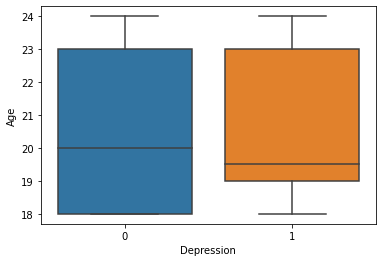

In [27]:
# Boxplot with the x axis for "Age" and Y axis indicating depression state
sns.boxplot(x = "Depression", y = "Age", data = dataset)

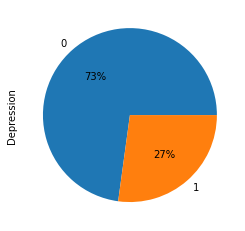

In [28]:
# Pie Chart for the frequency of each value (0,1) appearing in the dataset
plot = dataset["Depression"].value_counts().plot.pie(y='Depression', autopct='%1.0f%%')

# -- End of EDA --

# -- Start of Data Modelling --

In [29]:
dataset.head()

,Gender,Age,Course,Year,CGPA,Marital_status,Anxiety,Panic_attack,Depression
0,1,21.0,19,2,0.99,0,1,0,0
1,1,21.0,17,1,3.75,0,1,1,1
2,1,23.0,26,4,3.25,0,0,0,0
3,1,19.0,12,2,0.99,0,0,1,0
4,0,23.0,28,2,3.75,1,0,1,1


In [30]:
#split into X & y (predictors & target variable)
X = dataset.drop(['Depression'], axis=1).values  #Features
y = dataset['Depression'].values #target variable

In [31]:
from imblearn.over_sampling import SMOTE       # over-sampling our minority target variable
from collections import Counter

print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 59, 1: 22})
Resampled dataset shape Counter({0: 59, 1: 59})


In [32]:
#create train & test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=0,shuffle=True)

In [33]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scale = min_max_scaler.fit_transform(X_train)
X_test_scale = min_max_scaler.fit_transform(X_test)

In [34]:
# only needed if not installed before
#pip install -U imbalanced-learn

Defining and Compiling the Keras Model

In [35]:
import tensorflow as tf
from tensorflow import keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

Compiling the model with appropriate parametes

In [36]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Fitting the model

In [37]:
model.fit(X_train_scale,y_train, epochs = 50)

Epoch 1/50
3/3 [==============================] - 1s 6ms/step - loss: 0.6887 - accuracy: 0.6364
Epoch 2/50
3/3 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.7727
Epoch 3/50
3/3 [==============================] - 0s 4ms/step - loss: 0.6806 - accuracy: 0.7614
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 0.6732 - accuracy: 0.7955
Epoch 5/50
3/3 [==============================] - 0s 4ms/step - loss: 0.6695 - accuracy: 0.8182
Epoch 6/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.8409
Epoch 7/50
3/3 [==============================] - 0s 4ms/step - loss: 0.6599 - accuracy: 0.7727
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6554 - accuracy: 0.7955
Epoch 9/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6492 - accuracy: 0.7955
Epoch 10/50
3/3 [==============================] - 0s 4ms/step - loss: 0.6480 - accuracy: 0.8068
Epoch 11/50
3/3 [======================

Evaluating the model accuracy

In [38]:
_, accuracy = model.evaluate(X_train_scale, y_train)
print("Accuracy for Training: ", accuracy)


3/3 [==============================] - 0s 3ms/step - loss: 0.4440 - accuracy: 0.9432
Accuracy for Training:  0.9431818127632141


In [39]:
train_predictions = model.predict_on_batch(X_train_scale)

for i in range(5):
    print(X_train_scale[i].tolist(), "predicts", train_predictions[i], " ACTUAL : ", y_train[i])

[0.0, 0.0, 0.5483870967741935, 0.6666666666666667, 0.818840579710145, 0.0, 0.0, 1.0] predicts [0.46680108]  ACTUAL :  0
[0.0, 0.16666666666666652, 0.6451612903225806, 0.3333333333333333, 1.0000000000000002, 1.0, 0.0, 0.0] predicts [0.63578975]  ACTUAL :  1
[1.0, 0.16666666666666652, 0.7419354838709677, 0.6666666666666667, 1.0000000000000002, 1.0, 0.0, 1.0] predicts [0.6668483]  ACTUAL :  1
[1.0, 1.0, 0.5483870967741935, 0.6666666666666667, 0.0, 0.0, 1.0, 0.0] predicts [0.2953579]  ACTUAL :  0
[1.0, 0.16666666666666652, 0.3870967741935484, 0.3333333333333333, 0.0, 0.0, 0.0, 1.0] predicts [0.34249923]  ACTUAL :  0


Testing against historical data

In [40]:
_, accuracy = model.evaluate(X_test_scale, y_test)
print("Accuracy for Testing: ", accuracy)

1/1 [==============================] - 0s 24ms/step - loss: 0.4767 - accuracy: 0.8667
Accuracy for Testing:  0.8666666746139526


In [41]:
test_predictions = model.predict_on_batch(X_test_scale)

for i in range(5):
    print(X_test_scale[i].tolist(), "predicts", test_predictions[i], " ACTUAL : ", y_test[i])

[0.0, 0.2024706731011645, 0.014321602573799094, 0.14321602573799092, 1.0000000000000002, 0.0, 0.2148240386069864, 0.7851759613930136] predicts [0.572302]  ACTUAL :  1
[0.0, 0.09065500263049397, 0.7877263349116298, 0.36262001052197607, 1.0000000000000002, 0.5439300157829641, 0.0, 0.5439300157829641] predicts [0.6173418]  ACTUAL :  1
[0.0, 1.0, 0.3282218870586667, 0.6496285124177776, 1.0000000000000002, 1.0, 0.051114462746666756, 1.0] predicts [0.6523566]  ACTUAL :  1
[0.0, 0.33333333333333304, 0.9, 0.0, 0.63768115942029, 0.0, 0.0, 0.0] predicts [0.3169891]  ACTUAL :  0
[0.40758543113795753, 0.09873576147700724, 0.4320690948103404, 0.13586181037931916, 1.0000000000000002, 0.0, 1.0, 0.5924145688620425] predicts [0.6647577]  ACTUAL :  1


# -- End of Data Modelling --